In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Path ke folder utama di Google Drive
drive_path = '/content/drive/My Drive/'

# Nama folder utama
main_folder = 'tomato'

# Path ke folder train, val, dan test
train_folder = os.path.join(drive_path, main_folder, 'train')
val_folder = os.path.join(drive_path, main_folder, 'val')
test_folder = os.path.join(drive_path, main_folder, 'Testing')

# List file dan folder dalam setiap direktori
train_files = os.listdir(train_folder)
val_files = os.listdir(val_folder)
test_files = os.listdir(test_folder)

# Tampilkan isi folder
print(f"Isi folder 'train': {train_files}")
print(f"Isi folder 'val': {val_files}")
print(f"Isi folder 'test': {test_files}")

Isi folder 'train': ['Tomato___Leaf_Mold', 'Tomato___Late_blight', 'Tomato___Target_Spot', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Bacterial_spot', 'Tomato___healthy', 'Tomato___Early_blight', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
Isi folder 'val': ['Tomato___Bacterial_spot', 'Tomato___healthy', 'Tomato___Early_blight', 'Tomato___Leaf_Mold', 'Tomato___Late_blight', 'Tomato___Septoria_leaf_spot', 'Tomato___Target_Spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
Isi folder 'test': ['Tomato___healthy', 'Tomato___Early_blight', 'Tomato___Bacterial_spot', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Target_Spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']


In [ ]:
# Pengaturan generator data
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data directories
train_dir = train_folder
validation_dir = val_folder
test_dir = test_folder

# Create ImageDataGenerator for training
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# Create ImageDataGenerator for validation and testing (only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define batch size
batch_size = 16

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=True)

validation_generator = val_datagen.flow_from_directory(
    validation_dir, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)

Found 8000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Hitung jumlah kelas
num_classes = len(os.listdir(train_folder))

# Buat model CNN dengan Sequential
model = Sequential([
    # Layer konvolusi pertama
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # Layer konvolusi kedua
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Layer konvolusi ketiga
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten dan Dense
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # untuk mencegah overfitting
    Dense(num_classes, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Tampilkan ringkasan model (opsional)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,250 (42.61 MB)

 Trainable params: 11,170,250 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Membuat folder untuk menyimpan model (jika belum ada)
checkpoint_path = 'best_model.h5'

# Callback yang digunakan
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-6)
]

In [9]:
# Melatih model
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=callbacks
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2118 - loss: 2.1886 
Epoch 1: val_loss improved from inf to 1.53881, saving model to best_model.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 6912s 14s/step - accuracy: 0.2119 - loss: 2.1880 - val_accuracy: 0.5320 - val_loss: 1.5388 - learning_rate: 0.0010
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.5156 - loss: 1.3625
Epoch 2: val_loss improved from 1.53881 to 1.41353, saving model to best_model.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 143s 261ms/step - accuracy: 0.5157 - loss: 1.3623 - val_accuracy: 0.5390 - val_loss: 1.4135 - learning_rate: 0.0010
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.6131 - loss: 1.1031
Epoch 3: val_loss improved from 1.41353 to 1.34966, saving model to best_model.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 133s 266ms/step - accuracy: 0.6131 - loss: 1.1031 - val_accuracy: 0.5880 - val_loss: 1.3497 - learning_rate: 0.0010
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.6677 - loss: 0.9559
Epoch 4: val_loss improved from 1.34966 to 1.21210, saving model to best_model.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 130s 260ms/step - accuracy: 0.6677 - loss: 0.9559 - val_accuracy: 0.6480 - val_loss: 1.2121 - learning_rate: 0.0010
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.7090 - loss: 0.8188
Epoch 5: val_loss improved from 1.21210 to 0.81531, saving model to best_model.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 129s 257ms/step - accuracy: 0.7090 - loss: 0.8188 - val_accuracy: 0.7330 - val_loss: 0.8153 - learning_rate: 0.0010
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.7184 - loss: 0.7857
Epoch 6: val_loss improved from 0.81531 to 0.72468, saving model to best_model.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 130s 260ms/step - accuracy: 0.7184 - loss: 0.7857 - val_accuracy: 0.7550 - val_loss: 0.7247 - learning_rate: 0.0010
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.7526 - loss: 0.6898
Epoch 7: val_loss did not improve from 0.72468
500/500 ━━━━━━━━━━━━━━━━━━━━ 140s 258ms/step - accuracy: 0.7526 - loss: 0.6898 - val_accuracy: 0.7040 - val_loss: 0.9267 - learning_rate: 0.0010
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.7518 - loss: 0.6870
Epoch 8: val_loss improved from 0.72468 to 0.60044, saving model to best_model.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 128s 256ms/step - accuracy: 0.7518 - loss: 0.6869 - val_accuracy: 0.7960 - val_loss: 0.6004 - learning_rate: 0.0010
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.7729 - loss: 0.6412
Epoch 9: val_loss did not improve from 0.60044
500/500 ━━━━━━━━━━━━━━━━━━━━ 129s 258ms/step - accuracy: 0.7729 - loss: 0.6411 - val_accuracy: 0.7660 - val_loss: 0.8770 - learning_rate: 0.0010
Epoch 10/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.7932 - loss: 0.5998
Epoch 10: val_loss did not improve from 0.60044
500/500 ━━━━━━━━━━━━━━━━━━━━ 126s 251ms/step - accuracy: 0.7932 - loss: 0.5997 - val_accuracy: 0.7630 - val_loss: 0.7343 - learning_rate: 0.0010
Epoch 11/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.7803 - loss: 0.6096
Epoch 11: val_loss improved from 0.60044 to 0.53951, saving model to best_model.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 129s 258ms/step - accuracy: 0.7803 - loss: 0.6095 - val_accuracy: 0.8050 - val_loss: 0.5395 - learning_rate: 0.0010
Epoch 12/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.8090 - loss: 0.5419
Epoch 12: val_loss did not improve from 0.53951
500/500 ━━━━━━━━━━━━━━━━━━━━ 130s 260ms/step - accuracy: 0.8090 - loss: 0.5419 - val_accuracy: 0.8250 - val_loss: 0.5891 - learning_rate: 0.0010
Epoch 13/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.8053 - loss: 0.5584
Epoch 13: val_loss improved from 0.53951 to 0.52895, saving model to best_model.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 129s 257ms/step - accuracy: 0.8053 - loss: 0.5583 - val_accuracy: 0.8320 - val_loss: 0.5289 - learning_rate: 0.0010
Epoch 14/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.8268 - loss: 0.4864
Epoch 14: val_loss improved from 0.52895 to 0.47351, saving model to best_model.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 141s 257ms/step - accuracy: 0.8268 - loss: 0.4864 - val_accuracy: 0.8460 - val_loss: 0.4735 - learning_rate: 0.0010
Epoch 15/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.8313 - loss: 0.4855
Epoch 15: val_loss improved from 0.47351 to 0.35079, saving model to best_model.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 129s 257ms/step - accuracy: 0.8313 - loss: 0.4855 - val_accuracy: 0.8980 - val_loss: 0.3508 - learning_rate: 0.0010
Epoch 16/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.8455 - loss: 0.4598
Epoch 16: val_loss did not improve from 0.35079
500/500 ━━━━━━━━━━━━━━━━━━━━ 139s 253ms/step - accuracy: 0.8455 - loss: 0.4598 - val_accuracy: 0.8630 - val_loss: 0.4424 - learning_rate: 0.0010
Epoch 17/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.8530 - loss: 0.4106
Epoch 17: val_loss did not improve from 0.35079
500/500 ━━━━━━━━━━━━━━━━━━━━ 129s 257ms/step - accuracy: 0.8530 - loss: 0.4107 - val_accuracy: 0.8580 - val_loss: 0.5102 - learning_rate: 0.0010
Epoch 18/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.8397 - loss: 0.4573
Epoch 18: val_loss did not improve from 0.35079

Epoch 18: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
500/500 ━━━━━━━━━━━━━━━━━━━━ 128s 256ms/step - accuracy: 0.8397 - loss: 

63/63 ━━━━━━━━━━━━━━━━━━━━ 849s 14s/step - accuracy: 0.8953 - loss: 0.3588
Test Accuracy: 91.20%
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.92      0.90      0.91       100
                        Tomato___Early_blight       0.92      0.85      0.89       100
                         Tomato___Late_blight       0.98      0.90      0.94       100
                           Tomato___Leaf_Mold       0.94      0.91      0.92       100
                  Tomato___Septoria_leaf_spot       0.84      0.92      0.88       100
Tomato___Spider_mites Two-spotted_spider_mite       0.86      0.90      0.88       100
                         Tomato___Target_Spot       0.83      0.80      0.81       103
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.99      0.95      0.97        97
                 Tomato___Tomato_mosaic_virus       0.88      1.00      0.94   

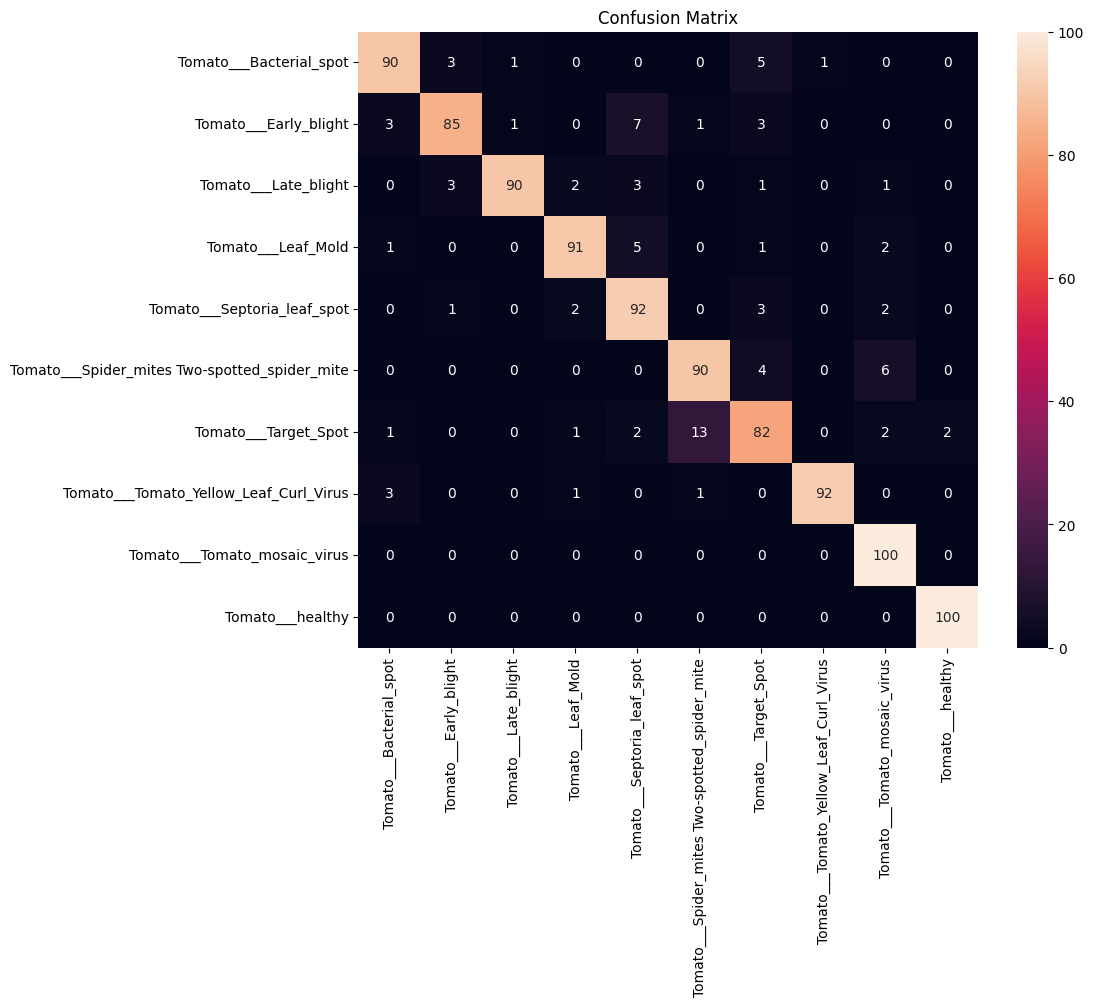

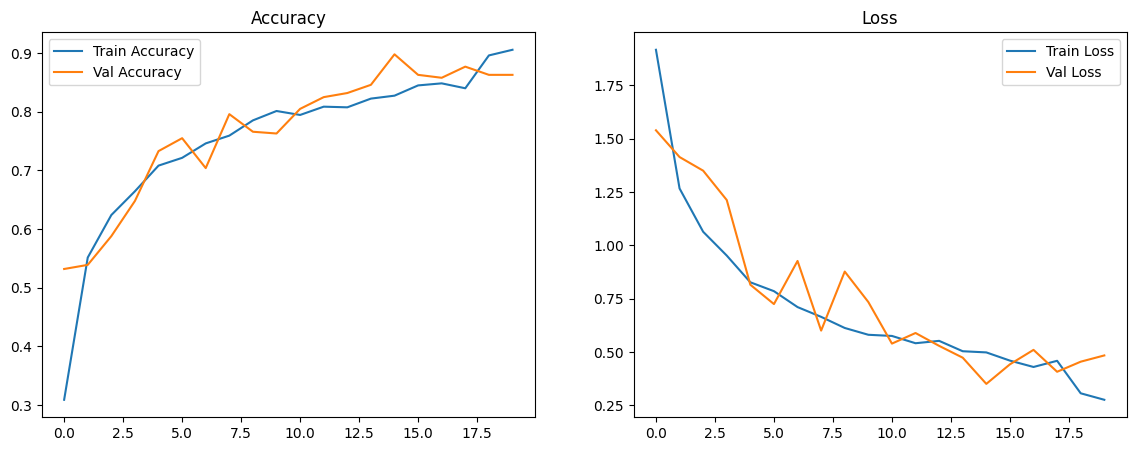

In [10]:
# Evaluasi
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc*100:.2f}%")

# Confusion matrix
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

print(classification_report(y_true, y_pred_classes, target_names=list(test_generator.class_indices.keys())))

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.show()

# Plot akurasi & loss
def plot_history(hist):
    plt.figure(figsize=(14,5))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(hist.history['accuracy'], label='Train Accuracy')
    plt.plot(hist.history['val_accuracy'], label='Val Accuracy')
    plt.legend()
    plt.title("Accuracy")

    # Loss
    plt.subplot(1,2,2)
    plt.plot(hist.history['loss'], label='Train Loss')
    plt.plot(hist.history['val_loss'], label='Val Loss')
    plt.legend()
    plt.title("Loss")

    plt.show()

plot_history(history)


In [23]:
import tensorflow as tf
import tensorflowjs as tfjs

# Buat direktori
os.makedirs("submission/saved_model", exist_ok=True)
os.makedirs("submission/tflite", exist_ok=True)
os.makedirs("submission/tfjs_model", exist_ok=True)

# Menyimpan dalam format savedmodel
model.export("submission/saved_model")

# TF-Lite
converter = tf.lite.TFLiteConverter.from_saved_model("submission/saved_model")
tflite_model = converter.convert()

# Simpan file TFLite
with open("submission/tflite/model.tflite", "wb") as f:
    f.write(tflite_model)

# Simpan label
labels = [
    "Tomato___Bacterial_spot",
    "Tomato___Early_blight",
    "Tomato___Late_blight",
    "Tomato___Leaf_Mold",
    "Tomato___Septoria_leaf_spot",
    "Tomato___Spider_mites Two-spotted_spider_mite",
    "Tomato___Target_Spot",
    "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "Tomato___Tomato_mosaic_virus",
    "Tomato___healthy"
]
with open("submission/tflite/label.txt", "w") as f:
    f.write("\n".join(labels))

# TFJS
tfjs.converters.save_keras_model(model, "submission/tfjs_model")


Saved artifact at 'submission/saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  140104924893392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140104897936848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140104898135056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140104898136976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140104898136208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140104898137744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140104924894160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140104898138128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140104898138512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140104898140048: TensorSpec(shape=(), dtype=tf.resource, name=None)


failed to lookup keras version from the file,
    this is likely a weight only file
